# **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import plotly.express as px

# **Data Loading**

In [ ]:
data=pd.read_excel("/content/employee_burnout_analysis-AI.xlsx")

# **Data Overview**

In [ ]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [ ]:
data.shape

(22750, 9)

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [ ]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


# **Data Preprocessing**

In [ ]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
data.shape

(18590, 9)

In [ ]:
data.shape

(18590, 9)

In [ ]:
data['Gender'].value_counts()

Gender
Female    9747
Male      8843
Name: count, dtype: int64

In the given data set female are more contributing to the organisation

In [ ]:
data['Company Type'].value_counts()

Company Type
Service    12174
Product     6416
Name: count, dtype: int64

In [ ]:
data['WFH Setup Available'].value_counts()

WFH Setup Available
Yes    10030
No      8560
Name: count, dtype: int64

In [ ]:
data['Designation'].value_counts()

Designation
2    6214
3    4920
1    3954
4    1947
0    1238
5     317
Name: count, dtype: int64

In [ ]:
data['Resource Allocation'].value_counts()

Resource Allocation
4.0     3396
5.0     3364
3.0     2761
6.0     2590
2.0     1794
7.0     1697
1.0     1551
8.0      907
9.0      396
10.0     134
Name: count, dtype: int64

In [ ]:
data['Mental Fatigue Score'].value_counts()

Mental Fatigue Score
6.0    429
5.9    413
6.3    410
6.1    406
5.8    406
      ... 
0.2     20
0.6     20
0.4     15
0.1     13
0.3     11
Name: count, Length: 101, dtype: int64

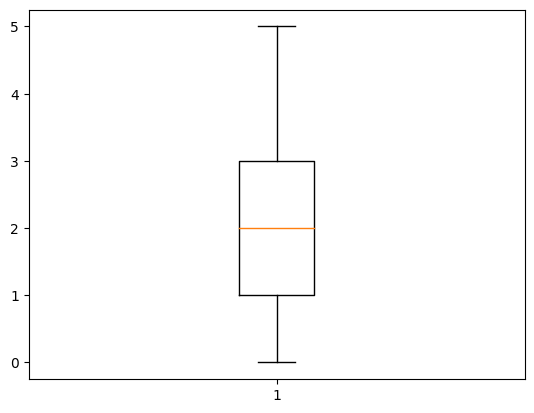

In [ ]:
plt.boxplot(data['Designation'])
plt.show()

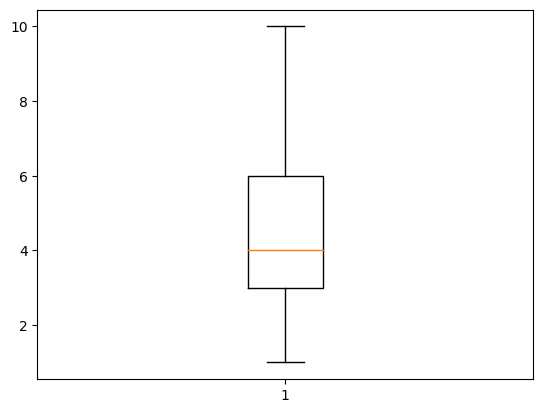

In [ ]:
plt.boxplot(data['Resource Allocation'])
plt.show()

In [ ]:
fig=px.box(data,y='Mental Fatigue Score')
fig.show()

In [ ]:
data=data[data['Mental Fatigue Score']>=0.9]

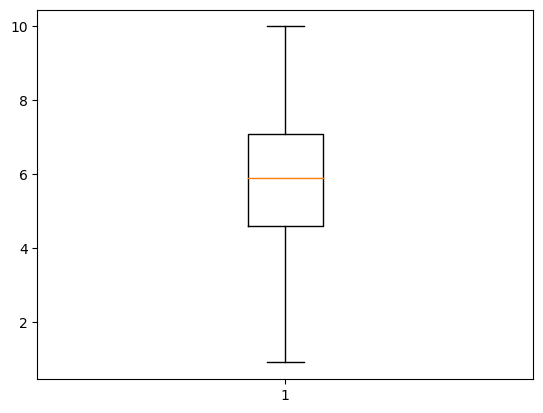

In [ ]:
plt.boxplot(data['Mental Fatigue Score'])
plt.show()

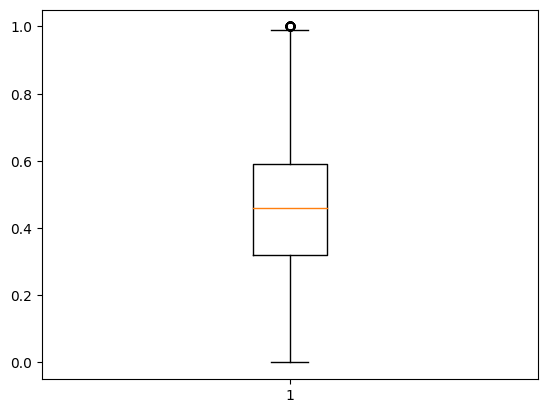

In [ ]:
plt.boxplot(data['Burn Rate'])
plt.show()

In [ ]:
fig=px.box(data,y='Burn Rate')
fig.show()

In [ ]:
data=data[(data['Burn Rate']<=0.99) & (data['Burn Rate']>=0)]

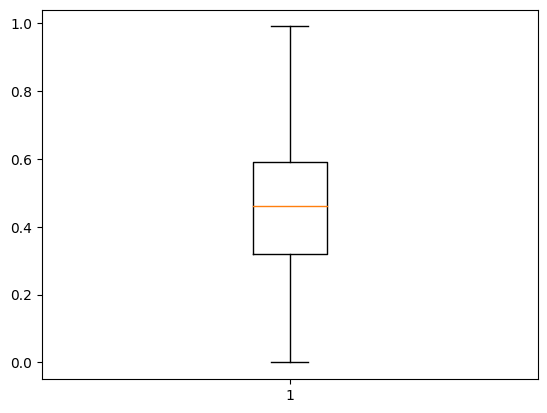

In [ ]:
plt.boxplot(data['Burn Rate'])
plt.show()

In [ ]:
data.shape

(18215, 9)

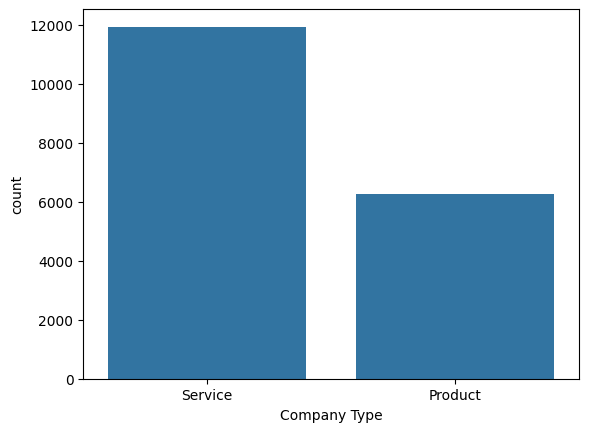

In [ ]:
categorical_var='Company Type'
sns.countplot(x=categorical_var,data=data)
plt.show()

In [ ]:
category_counts=data['Company Type'].value_counts()
print(category_counts)

Company Type
Service    11939
Product     6276
Name: count, dtype: int64


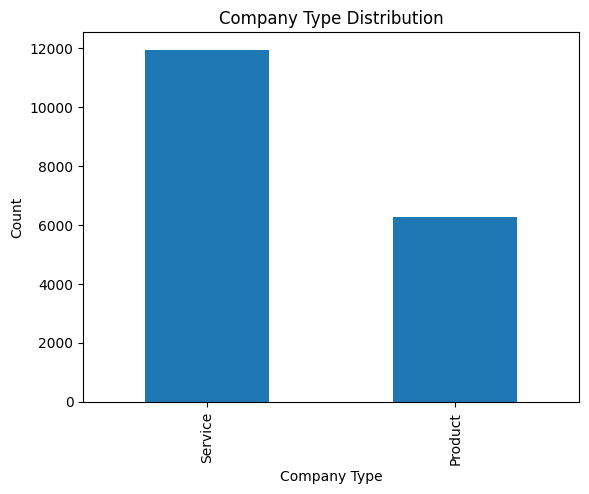

In [ ]:
data['Company Type'].value_counts().plot(kind='bar')
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.title('Company Type Distribution')
plt.show()

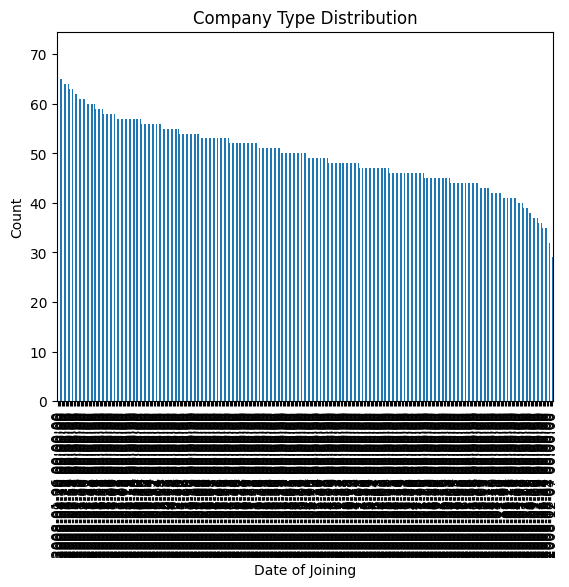

In [ ]:
data['Date of Joining'].value_counts().plot(kind='bar')
plt.xlabel('Date of Joining')
plt.ylabel('Count')
plt.title('Company Type Distribution')
plt.show()

# **Exploratory Data Analysis**

Using multivariate anlaysis with respect to target variable(Burn Rate)

In [ ]:
dupli_data=data.copy()

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.719458
Resource Allocation     0.845620
Mental Fatigue Score    0.941141
Name: Burn Rate, dtype: float64

In [ ]:
data.shape

(18215, 9)

In [ ]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

The employee ID doesn't provide any useful information so it must be dropped.

In [ ]:
data=data.drop('Employee ID',axis=1)

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Employees'>

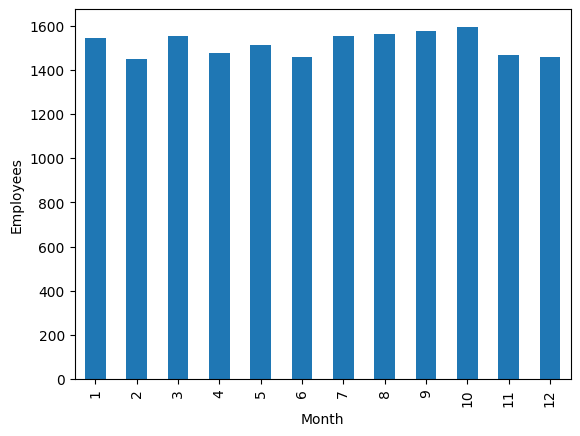

In [ ]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month=data.copy()
data_month['Date of Joining']=data_month['Date of Joining'].astype('datetime64[ns]') #specify time unit as nanoseconds
data_month['Date of Joining'].groupby(data_month['Date of Joining'].dt.month).count().plot(kind='bar',xlabel='Month',ylabel='Employees')

The date of joining is uniform distributed with values between 2008-01-10 and 2008-12-31. So in order to create a new feature which represents the labor seniority, we could create a variable with the days worked.

creating a column named days for representing number of days, the employee work upto now in organisation.

In [ ]:
data_2008=pd.to_datetime(["2008-01-01"]*len(data))
#Specify time unit as nanoseconds when converting to datetime64
data["Days"]=data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18215, dtype: int64

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.719458
Resource Allocation     0.845620
Mental Fatigue Score    0.941141
Burn Rate               1.000000
Days                    0.003017
Name: Burn Rate, dtype: float64

The value of correlation between Days and Burn Rate is 0.003017, which is very less compared to other columns in the date frame. Therefore this Days and Date of Joining Column has to be dropped from the data frame.

In [ ]:
data=data.drop(['Date of Joining','Days'],axis=1)

In [ ]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


# **Data Visualization**

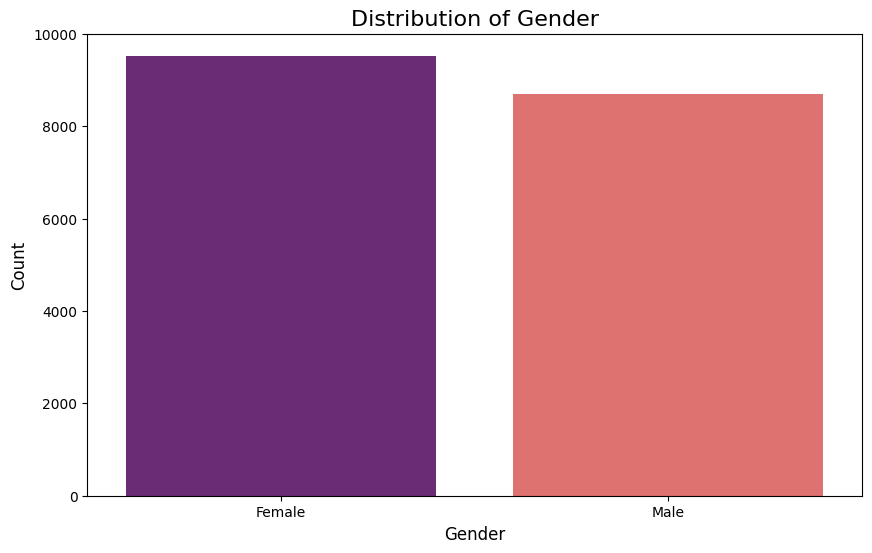

In [ ]:
# Count plot distribution of "Gender"
plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", hue="Gender", data=data, palette="magma", legend=False)
plt.title("Distribution of Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

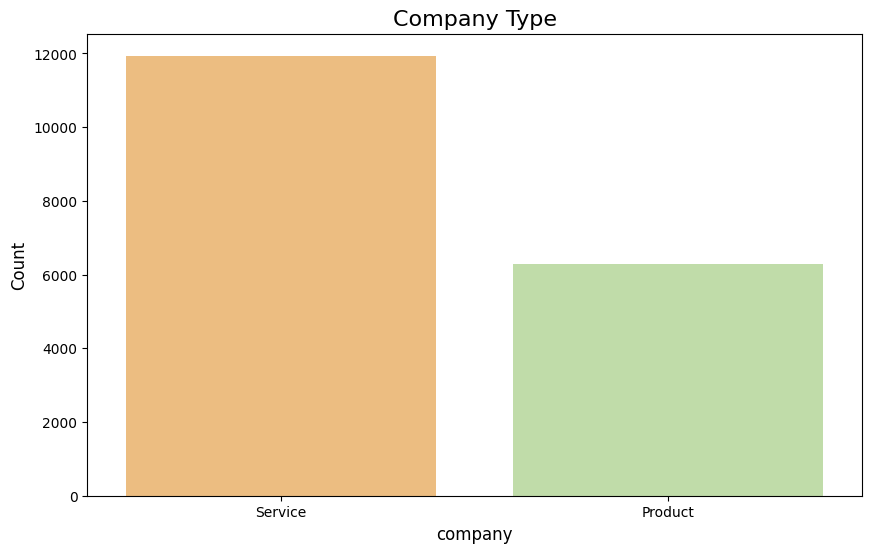

In [ ]:
# Count plot distribution of "Gender"
plt.figure(figsize=(10, 6))
sns.countplot(x="Company Type", hue="Company Type", data=data, palette="Spectral", legend=False)
plt.title("Company Type", fontsize=16)
plt.xlabel("company", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

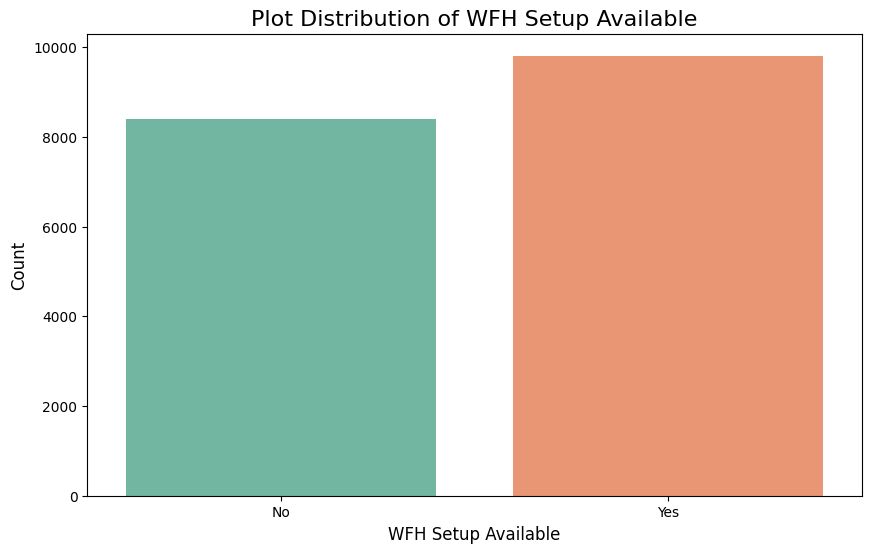

In [ ]:
# Count plot distribution of "Gender"
plt.figure(figsize=(10, 6))
sns.countplot(x="WFH Setup Available", hue="WFH Setup Available", data=data, palette="Set2", legend=False)
plt.title("Plot Distribution of WFH Setup Available", fontsize=16)
plt.xlabel("WFH Setup Available", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
#plot distribution of Burn rate on the basis of Designation
fig=px.line(data,y="Burn Rate",color="Designation",title="Burn rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#plot distribution of Burn Rate on the basis of Gender
fig=px.line(data,y="Burn Rate",color="Gender",title="Burn rate on the basis of Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
#plot distribution of Burn Rate on the basis of Designation
fig=px.line(data,y="Mental Fatigue Score",color="Designation",title="Mental fatigue vs Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


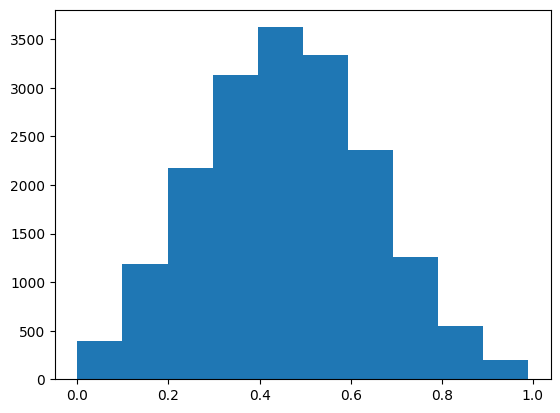

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['Burn Rate'])
plt.show()

# **Feature Engineering**

# One Hot Encoding

In [ ]:
#check if the columns exist before applying get_dummies
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
  data=pd.get_dummies(data,columns=['Company Type', 'WFH Setup Available', 'Gender'],drop_first=True)
  data.head()
  encoded_columns=data.columns
  print(encoded_columns)
else:
  print("Error: One or more of the specified columns are not present in the Data Frame.")
#Add debugging steps here to investigate why the columns are missing
# for example, print the existing columns:
print(data.columns)

Index(['Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate', 'Company Type_Service', 'WFH Setup Available_Yes',
       'Gender_Male'],
      dtype='object')
Index(['Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate', 'Company Type_Service', 'WFH Setup Available_Yes',
       'Gender_Male'],
      dtype='object')


In [ ]:
data.columns.tolist()

['Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate',
 'Company Type_Service',
 'WFH Setup Available_Yes',
 'Gender_Male']

In [ ]:
data.corr()['Burn Rate'][:]

Designation                0.719458
Resource Allocation        0.845620
Mental Fatigue Score       0.941141
Burn Rate                  1.000000
Company Type_Service       0.003784
WFH Setup Available_Yes   -0.314860
Gender_Male                0.159454
Name: Burn Rate, dtype: float64

Columns named Company Type_Service, WFH Setup Available_Yes, Gender_Male are removed from the data frame as there correlation with Burn Rate column is too low.

In [ ]:
data=data.drop('Company Type_Service',axis=1)
data=data.drop('WFH Setup Available_Yes',axis=1)
data=data.drop('Gender_Male',axis=1)

In [ ]:
data

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2,3.0,3.8,0.16
1,1,2.0,5.0,0.36
3,1,1.0,2.6,0.20
4,3,7.0,6.9,0.52
5,2,4.0,3.6,0.29
...,...,...,...,...
22743,1,3.0,6.0,0.48
22744,3,7.0,6.2,0.54
22746,3,6.0,6.7,0.59
22748,2,5.0,5.9,0.52


# Normalization or Feature selection

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Select numerical columns (excluding one-hot encoded)
numerical_cols = ['Designation','Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
data.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0.4,0.222222,0.318681,0.161616
1,0.2,0.111111,0.450549,0.363636
3,0.2,0.000000,0.186813,0.202020
4,0.6,0.666667,0.659341,0.525253
5,0.4,0.333333,0.296703,0.292929


# **Model Training**

In [ ]:
#Split df into x and y
y=data['Burn Rate']
x=data.drop('Burn Rate',axis=1)

In [ ]:
#Train the split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=1)
#scaler x
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),index=x_test.index,columns=x_test.columns)

In [ ]:
x_train

,Designation,Resource Allocation,Mental Fatigue Score
11549,0.2,0.111111,0.175824
15063,0.8,0.666667,0.604396
3275,0.2,0.222222,0.285714
3939,0.8,0.777778,0.538462
13943,0.6,0.444444,0.538462
...,...,...,...
13735,0.4,0.555556,0.604396
21623,0.6,0.444444,0.604396
6471,0.6,0.666667,0.857143
15260,0.2,0.222222,0.615385


In [ ]:
y_train

11549    0.171717
15063    0.595960
3275     0.191919
3939     0.545455
13943    0.474747
           ...   
13735    0.575758
21623    0.424242
6471     0.707071
15260    0.464646
294      0.393939
Name: Burn Rate, Length: 4553, dtype: float64

# Linear Regression

In [ ]:
#from sklearn.linear_model import LinearRegression
#create a instance of LinearRegression class
linear_regression_model=LinearRegression()
#Train the model
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Linear Regressing model performance matrix
print("Linear Regression Model Performance:")
#make predictions on the test set
y_pred=linear_regression_model.predict(x_test)
#calculate mean squared error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)
#calculate root mean squared error
rmse=mean_squared_error(y_test,y_pred,squared=False)
print("Root Mean Squared error:",rmse)
#calculate mean absolute error
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute error:",mae)
#calcualte R-squared score
r2=r2_score(y_test,y_pred)
print("R-squared score:",r2)

Linear Regression Model Performance:
Mean Squared Error: 0.0031053743161061206
Root Mean Squared error: 0.055725885512086036
Mean Absolute error: 0.04569259118674783
R-squared score: 0.9139103276786389


In the above data regarding error, r2_score value is near to 1. Higher the value of r2_score higher is the accuarcy, and model can predict the near value to the actual value.

# **Model validation and Evaluation**

In [ ]:
# 1. Create DataFrame with your new input data
new_data = {'Designation': [0.2],
             'Resource Allocation': [0.111111],
             'Mental Fatigue Score': [0.175824],
             }
new_input = pd.DataFrame(new_data)
actual_value=0.171717
new_predictions = linear_regression_model.predict(new_input)
print("The prediction of burn Rate of an employee is: ",new_predictions," and actual value is: ",actual_value)


The prediction of burn Rate of an employee is:  [0.14073173]  and actual value is:  0.171717


In [ ]:
# 1. Create DataFrame with your new input data
new_data = {'Designation': [0.8],
             'Resource Allocation': [0.666667],
             'Mental Fatigue Score': [0.604396],
             }
new_input = pd.DataFrame(new_data)
actual_value=0.595960
new_predictions = linear_regression_model.predict(new_input)
print("The prediction of Burn Rate of an employee is: ",new_predictions," and actual value is: ",actual_value)


The prediction of Burn Rate of an employee is:  [0.56849091]  and actual value is:  0.59596


In [ ]:
# 1. Create DataFrame with your new input data
new_data = {'Designation': [0.2],
             'Resource Allocation': [0.222222],
             'Mental Fatigue Score': [0.285714],
             }
new_input = pd.DataFrame(new_data)
actual_value=0.191919
new_predictions = linear_regression_model.predict(new_input)
print("The prediction of Burn Rate of an employee  is: ",new_predictions," and actual value is: ",actual_value)


The prediction of Burn Rate of an employee  is:  [0.2463468]  and actual value is:  0.191919


In [ ]:
# 1. Create DataFrame with your new input data
new_data = {'Designation': [0.8],
             'Resource Allocation': [0.777778],
             'Mental Fatigue Score': [0.538462],
             }
new_input = pd.DataFrame(new_data)
actual_value=0.545455
new_predictions = linear_regression_model.predict(new_input)
print("The prediction of Burn Rate of an employee  is: ",new_predictions," and actual value is: ",actual_value)


The prediction of Burn Rate of an employee  is:  [0.5506378]  and actual value is:  0.545455


In [ ]:
# 1. Create DataFrame with your new input data
new_data = {'Designation': [0.6],
             'Resource Allocation': [0.444444],
             'Mental Fatigue Score': [0.538462],
             }
new_input = pd.DataFrame(new_data)
actual_value=0.474747
new_predictions = linear_regression_model.predict(new_input)
print("The prediction of Burn Rate of an employee  is: ",new_predictions," and actual value is: ",actual_value)


The prediction of Burn Rate of an employee  is:  [0.47043941]  and actual value is:  0.474747
